# Overview
The goal of this project is to use TensorFlow to predict credit card fraud based on transactions provided by the Machine Learning Group at the Free University in Brussels.
<br> Contributers:
<br>- Alec McGhie



## Step 1: Importing libraries


In [1]:
import tensorflow as tf
# Needed for MaxPool
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
# Needed for dataframes
import pandas as pd
#needed to translate labels into numpy
import numpy as np
# Needed for plotting the data
import matplotlib.pyplot as plt
# Needed for splitting the dataframe
from sklearn.model_selection import train_test_split
# Needed for scaling the features
from sklearn.preprocessing import StandardScaler

## Step 2: Data Preprocessing

#### Step 2.1: Uploading the data from dataworld
Original link [Credit Card Fraud Data](https://data.world/raghu543/credit-card-fraud-data)

In [2]:
credit_card_df = pd.read_csv("https://query.data.world/s/gyyiyxdr6fpnx42ragtni6ggdz5pok?dws=00000")
credit_card_df.head()
credit_card_df.shape

(284807, 31)

#### Step 2.2 Data Balancing
Due to the heavy imbalence in the data in order for the neural network to be effective we need to make the datasets more similar in size to avoid underfitting the model.


In [3]:
credit_card_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Step 2.3: Splitting the postive and negitive fraud results

In [4]:
fraud_postitive_df = credit_card_df[credit_card_df["Class"]==1]
print(fraud_postitive_df.head())
fraud_negitive_df = credit_card_df[credit_card_df["Class"]==0]
print(fraud_negitive_df.head())
fraud_postitive_df.shape , fraud_negitive_df.shape

        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.1778

((492, 31), (284315, 31))

#### 2.4 Cutting down the `fraud_negitive_df` to be the same size as `fraud_positive_df`

In [5]:
# Resizing the non fraud to be the same size as the fraud
fraud_negitive_df = fraud_negitive_df.head(492)
fraud_negitive_df.shape

(492, 31)

#### Step 2.5 Combining the reshaped `fraud_negitive_df` with `fraud_positive_df`

In [6]:
# Combining the two datasets
fraud_testing_df = fraud_negitive_df.append(fraud_postitive_df, ignore_index = True)
fraud_testing_df

<ipython-input-6-a3d8aa9a5ed7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fraud_testing_df = fraud_negitive_df.append(fraud_postitive_df, ignore_index = True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


#### Step 2.6: Splitting into Features and Labels

In [7]:
fraud_testing_labels = fraud_testing_df["Class"]
print(fraud_testing_labels)
fraud_testing_features = fraud_testing_df.drop("Class", axis = 1)
print(fraud_testing_features)

0      0
1      0
2      0
3      0
4      0
      ..
979    1
980    1
981    1
982    1
983    1
Name: Class, Length: 984, dtype: int64
         Time        V1        V2        V3        V4        V5        V6  \
0         0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1         0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2         1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3         1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4         2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..        ...       ...       ...       ...       ...       ...       ...   
979  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
980  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
981  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
982  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
983  170348.0  

## Step 3: Test-Train Split

#### Step 3.1: Splitting the data into `X_train`, `X_test`,`y_train`,`y_text`

In [8]:
X_train, X_test, y_train, y_test = train_test_split(fraud_testing_features, fraud_testing_labels, test_size = 0.2, random_state = 0, stratify = fraud_testing_labels)

#### Step 3.2: Scaling the features and converting labels into numpy

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(f"x train {X_train.shape}")

print(f" y test {y_test.shape}")

x train (787, 30)
 y test (197,)


#### Step 3.3 Changing into a 3 dimensional dataset

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

## Step 4: Model Building

#### 4.1 Building a sequential model using `tensorflow.keras` 

In [11]:
epochs = 10
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

## Step 5: Compiling the model using the `'Adam'` optimizer

In [12]:
model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])


## Step 6: Training the model

In [13]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
25/25 [==============================] - 7s 32ms/step - loss: 0.3612 - accuracy: 0.8780 - val_loss: 0.5122 - val_accuracy: 0.8629
Epoch 2/10
25/25 [==============================] - 0s 13ms/step - loss: 0.1651 - accuracy: 0.9441 - val_loss: 0.5411 - val_accuracy: 0.5279
Epoch 3/10
25/25 [==============================] - 0s 17ms/step - loss: 0.1330 - accuracy: 0.9632 - val_loss: 0.5811 - val_accuracy: 0.5127
Epoch 4/10
25/25 [==============================] - 0s 14ms/step - loss: 0.0853 - accuracy: 0.9733 - val_loss: 0.6560 - val_accuracy: 0.5076
Epoch 5/10
25/25 [==============================] - 0s 15ms/step - loss: 0.0718 - accuracy: 0.9746 - val_loss: 0.7439 - val_accuracy: 0.5076
Epoch 6/10
25/25 [==============================] - 0s 14ms/step - loss: 0.0558 - accuracy: 0.9771 - val_loss: 0.7921 - val_accuracy: 0.5127
Epoch 7/10
25/25 [==============================] - 0s 16ms/step - loss: 0.0516 - accuracy: 0.9835 - val_loss: 0.7437 - val_accuracy: 0.5381
Epoch 8/10
25

## Step 7: Model Evaluation

#### Step 7.1: Creating `plot_learningCurve` that takes in `history` and `epoch` to make a graph from the given input

In [14]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

#### Step 7.2: Running `plot_learningCurve` with the `history` and `epochs`

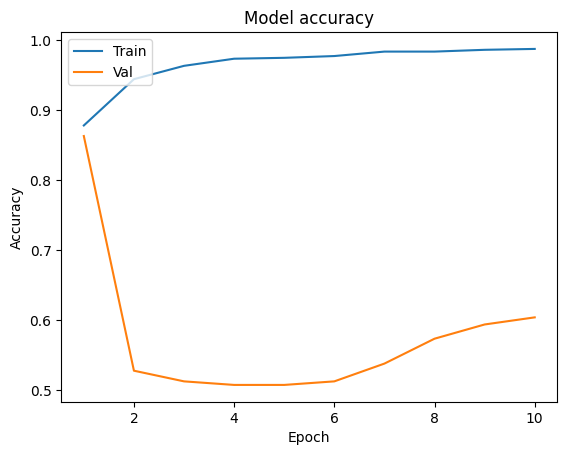

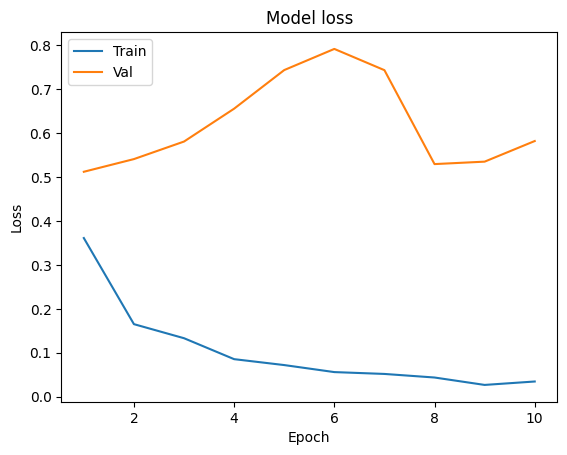

In [15]:
plot_learningCurve(history, epochs)

#### Step 7.3: Further evaluations

##### Feature Importance

In [16]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Create a separate variable to store the original 2D shape of X_test before reshaping
X_test_original = X_test.reshape(X_test.shape[0], X_test.shape[1])

def model_wrapper(X):
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return model.predict(X).flatten()

def custom_scorer(model_func, X, y):
    y_pred = np.round(model_func(X))
    return accuracy_score(y, y_pred)

# Pass X_test_original (2D) and custom_scorer to the permutation_importance function
result = permutation_importance(model_wrapper, X_test_original, y_test, n_repeats=10, random_state=0, n_jobs=-1, scoring=custom_scorer)

for i in range(X_train.shape[1]):
    print(f'Feature {i + 1}: {result.importances_mean[i]:.5f} +/- {result.importances_std[i]:.5f}')


7/7 [==============================] - 0s 5ms/step
Feature 1: 0.04772 +/- 0.00885
Feature 2: 0.01624 +/- 0.00673
Feature 3: -0.02234 +/- 0.00793
Feature 4: 0.00000 +/- 0.00681
Feature 5: 0.03401 +/- 0.00937
Feature 6: -0.00711 +/- 0.00406
Feature 7: 0.00863 +/- 0.00720
Feature 8: -0.00558 +/- 0.00620
Feature 9: -0.02386 +/- 0.00644
Feature 10: -0.00863 +/- 0.00603
Feature 11: 0.00812 +/- 0.01045
Feature 12: -0.01726 +/- 0.00689
Feature 13: 0.02538 +/- 0.00642
Feature 14: 0.00558 +/- 0.00833
Feature 15: 0.01168 +/- 0.00558
Feature 16: -0.00355 +/- 0.00683
Feature 17: -0.01980 +/- 0.00892
Feature 18: -0.00355 +/- 0.00457
Feature 19: -0.01827 +/- 0.01045
Feature 20: 0.00152 +/- 0.00644
Feature 21: -0.00203 +/- 0.00465
Feature 22: 0.00203 +/- 0.00337
Feature 23: -0.00761 +/- 0.00943
Feature 24: -0.00203 +/- 0.00650
Feature 25: -0.00051 +/- 0.00479
Feature 26: -0.00406 +/- 0.00443
Feature 27: 0.00355 +/- 0.00644
Feature 28: 0.00000 +/- 0.00321
Feature 29: -0.01929 +/- 0.00843
Feature 30: 0.

##### Accuracy Score

In [17]:
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy*100))

Accuracy: 60.41%


##### Precision and Recall

In [18]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred_classes)
print('Precision:', precision)
print('Recall:', recall)


7/7 [==============================] - 0s 4ms/step
Precision: [1.         0.55681818]
Recall: [0.21212121 1.        ]


##### F1 Score

In [19]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
f1score = f1_score(y_test, y_pred_classes)
print('F1-score:', f1score)


7/7 [==============================] - 0s 4ms/step
F1-score: 0.7153284671532847


##### Confustion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

7/7 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[21 78]
 [ 0 98]]


#### Step 7.3: Reflection on the first model
From the first model there is a clear indication that it wasn't able to properly predict the data and it was overfitting. To make this model better epoch increase and addition of maxpool will help with predictions.

## Step 8: Improving the Model

#### Step 8.1: Making adjustments to the model

In [21]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


#### Step 8.2 Compiling the new model using the `'Adam'` optimizer

In [22]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])


#### Step 8.3 Running the new model

In [23]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 4s 35ms/step - loss: 0.4648 - accuracy: 0.8018 - val_loss: 0.5552 - val_accuracy: 0.8782
Epoch 2/50
25/25 [==============================] - 0s 14ms/step - loss: 0.2292 - accuracy: 0.9187 - val_loss: 0.5049 - val_accuracy: 0.8477
Epoch 3/50
25/25 [==============================] - 0s 15ms/step - loss: 0.2100 - accuracy: 0.9327 - val_loss: 0.4586 - val_accuracy: 0.8376
Epoch 4/50
25/25 [==============================] - 0s 16ms/step - loss: 0.1713 - accuracy: 0.9428 - val_loss: 0.4091 - val_accuracy: 0.8376
Epoch 5/50
25/25 [==============================] - 0s 14ms/step - loss: 0.1368 - accuracy: 0.9581 - val_loss: 0.3721 - val_accuracy: 0.8477
Epoch 6/50
25/25 [==============================] - 0s 15ms/step - loss: 0.1516 - accuracy: 0.9466 - val_loss: 0.3254 - val_accuracy: 0.8782
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.1018 - accuracy: 0.9606 - val_loss: 0.2982 - val_accuracy: 0.8731
Epoch 8/50
25

#### Step 8.4: Evaluate the new model

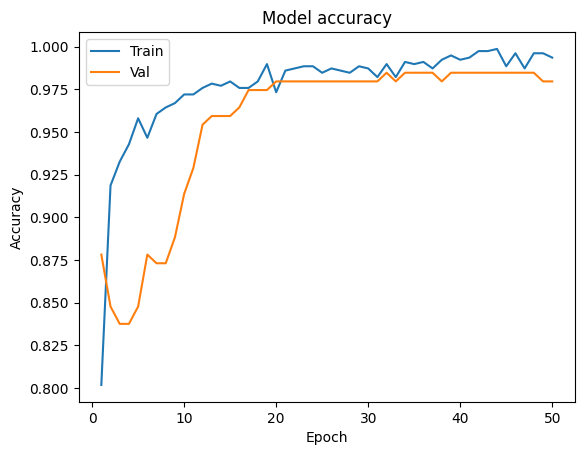

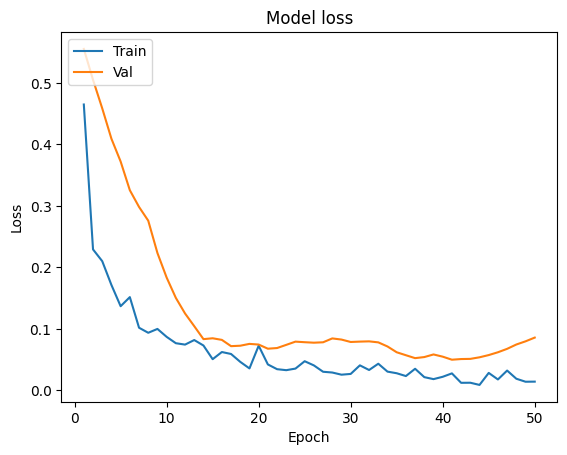

In [24]:
plot_learningCurve(history, epochs)

## Step 8.5: More model Evaluations

##### Feature Importance

In [25]:
# Calculate feature importance for the second model
result = permutation_importance(model_wrapper, X_test_original, y_test, n_repeats=10, random_state=0, n_jobs=-1, scoring=custom_scorer)

for i in range(X_train.shape[1]):
    print(f'Feature {i + 1}: {result.importances_mean[i]:.5f} +/- {result.importances_std[i]:.5f}')


7/7 [==============================] - 0s 2ms/step
Feature 1: 0.22437 +/- 0.01239
Feature 2: 0.01015 +/- 0.00393
Feature 3: 0.10000 +/- 0.01507
Feature 4: 0.00863 +/- 0.00510
Feature 5: 0.01269 +/- 0.00943
Feature 6: 0.00000 +/- 0.00000
Feature 7: 0.00609 +/- 0.00592
Feature 8: -0.00102 +/- 0.00305
Feature 9: 0.00355 +/- 0.00510
Feature 10: 0.00000 +/- 0.00227
Feature 11: 0.00203 +/- 0.00518
Feature 12: 0.00000 +/- 0.00000
Feature 13: 0.00406 +/- 0.00547
Feature 14: 0.00000 +/- 0.00000
Feature 15: -0.00102 +/- 0.00305
Feature 16: -0.00051 +/- 0.00152
Feature 17: 0.00102 +/- 0.00380
Feature 18: 0.00000 +/- 0.00000
Feature 19: 0.00152 +/- 0.00233
Feature 20: 0.00051 +/- 0.00273
Feature 21: 0.00203 +/- 0.00249
Feature 22: 0.00457 +/- 0.00355
Feature 23: -0.00305 +/- 0.00249
Feature 24: -0.00254 +/- 0.00341
Feature 25: 0.00051 +/- 0.00152
Feature 26: 0.00000 +/- 0.00000
Feature 27: 0.00000 +/- 0.00000
Feature 28: 0.00000 +/- 0.00000
Feature 29: 0.00000 +/- 0.00000
Feature 30: 0.00000 +/- 0

##### Accuracy Score

In [26]:
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy*100))

Accuracy: 97.97%


##### Precision and Recall

In [27]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred_classes)
print('Precision:', precision)
print('Recall:', recall)


7/7 [==============================] - 0s 2ms/step
Precision: [0.97979798 0.97959184]
Recall: [0.97979798 0.97959184]


##### F1-Score

In [28]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
f1score = f1_score(y_test, y_pred_classes)
print('F1-score:', f1score)


7/7 [==============================] - 0s 3ms/step
F1-score: 0.9795918367346939


##### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

7/7 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[97  2]
 [ 2 96]]
